In [3]:
# Populating the interactive namespace from numpy, matplotlib, math, scipy, clawpack.geoclaw
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from clawpack.geoclaw import fgmax_tools, geoplot

In [9]:
# reading the GeoClaw output
fg = fgmax_tools.FGmaxGrid()
fg.read_input_data("fgmax_grid.txt")
fg.read_output(outdir="_output")

Reading _output/fort.FG1.valuemax ...
Reading _output/fort.FG1.aux1 ...


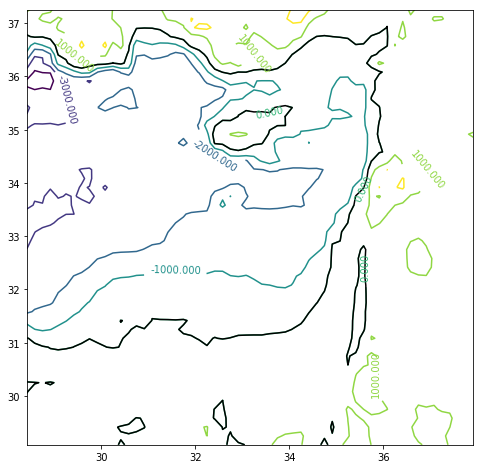

In [15]:
# plotting the contours of bathimetry and the coastline
plt.figure(figsize=(8, 8))
c1 = plt.contour(fg.X[200:, :50], fg.Y[200:, :50], fg.B[200:, :50])
plt.clabel(c1, inline=1, fontsize=10)
c2 = plt.contour(fg.X[200:, :50], fg.Y[200:, :50], fg.B[200:, :50], levels=[0], colors="k")

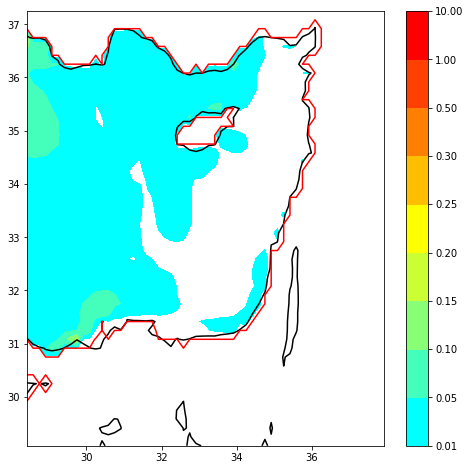

In [11]:
# plotting filled contours of surface elevation, and contours of coastline and zero runup line
clines_zeta = [0.01] + list(np.linspace(0.05,0.3,6)) + [0.5,1.0,10.0]
colors = geoplot.discrete_cmap_1(clines_zeta)
plt.figure(figsize=(8, 8))
plt.clf()
# calculating surface elevation in ocean
zeta = np.where(fg.B>0, fg.h, fg.h+fg.B)   # surface elevation in ocean
plt.contourf(fg.X[200:, :50],fg.Y[200:, :50],zeta[200:, :50],clines_zeta,colors=colors)
plt.colorbar()
plt.contour(fg.X[200:, :50],fg.Y[200:, :50],fg.B[200:, :50], levels=[0],colors='k')  # coastline
plt.contour(fg.X[200:, :50],fg.Y[200:, :50],zeta[200:, :50], levels=[0],colors='r')

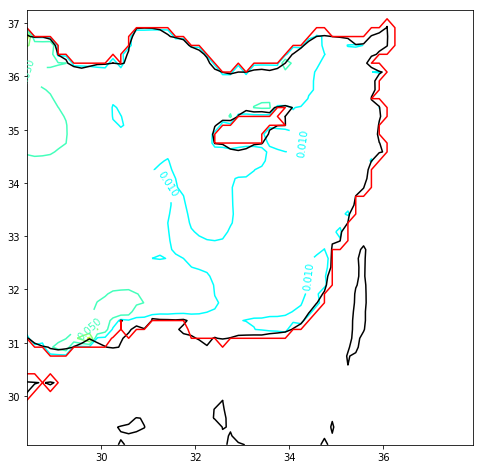

In [38]:
# plotting contours of surface elevation, and contours of coastline and zero water elevation line
plt.figure(figsize=(8, 8))
plt.clf()
zeta = np.where(fg.B>0, fg.h, fg.h+fg.B)   # surface elevation in ocean
c5 = plt.contour(fg.X[200:, :50],fg.Y[200:, :50],zeta[200:, :50],clines_zeta,colors=colors)
plt.clabel(c5, inline=1, fontsize=10)
c1 = plt.contour(fg.X[200:, :50],fg.Y[200:, :50],fg.B[200:, :50], levels=[0],colors='k')  # coastline
c2 = plt.contour(fg.X[200:, :50],fg.Y[200:, :50],zeta[200:, :50], levels=[0],colors='r')

In [292]:
# calculating indices for the given area
idx = [idx for idx in range(len(fg.X)) if fg.X[idx,1] >= 33.4 and fg.X[idx,1] <= 35.5]
idy = [idy for idy in range(len(fg.X[1,:])) if fg.Y[1,idy] >= 30.7 and fg.Y[1,idy] <= 33.8]

In [300]:
idy

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

In [281]:
fg.X[230:243, 1]

array([ 33.416667,  33.583333,  33.75    ,  33.916667,  34.083333,
        34.25    ,  34.416667,  34.583333,  34.75    ,  34.916667,
        35.083333,  35.25    ,  35.416667])

/Users/sharon/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


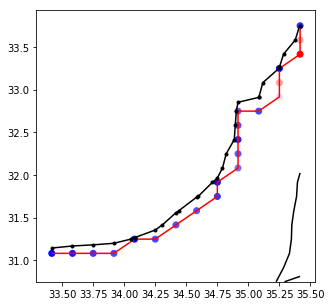

In [233]:
# plotting contours of coastline, zero water elevation line and scatter points of runup
plt.figure(figsize=(5, 5))
cisr = plt.contour(fg.X[230:243, 10:29],fg.Y[230:243, 10:29],fg.B[230:243, 10:29], levels=[0], colors ='k')  # coastline
cisr2 = plt.contour(fg.X[230:243, 10:29],fg.Y[230:243, 10:29],zeta[230:243, 10:29], levels=[0],colors='r')
plt.scatter(xyisr[:, 0], xyisr[:, 1], c=zisr, cmap="bwr")
plt.plot(xyisr_coast[:, 0], xyisr_coast[:, 1], 'k.')

In [13]:
# obtaining points along the coastline and zero water elevation line
xyisr = cisr2.collections[0].get_paths()[0].vertices
xyisr_coast = cisr.collections[0].get_paths()[0].vertices

In [16]:
xyisr.shape

(22, 2)

In [17]:
# calculating the runup by interpolating the bathimetry on the line of zero water elevation
zisr = interpolate.griddata((fg.X[230:243, 10:29].flatten(), fg.Y[230:243, 10:29].flatten()), fg.B[230:243, 10:29].flatten(), xyisr, "cubic")

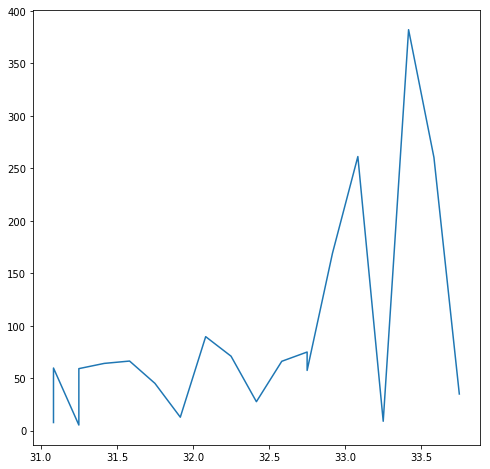

In [18]:
# plotting the runup as a function of latitude
plt.figure(figsize=(8, 8))
plt.plot(xyisr[:,1],zisr)

In [239]:
# interpolating the coastline, zero water elevation line and the runup on the 1000 points along the 
# zero water elevation line longitude
dummy_lon   = np.linspace(min(xyisr[:,0]),max(xyisr[:,0]),1000)
dummy_fh = interpolate.interp1d(xyisr[:,0], xyisr[:,1],bounds_error=False)
dummy_fb = interpolate.interp1d(xyisr_coast[:,0], xyisr_coast[:,1],bounds_error=False)
dummy_lat = dummy_fh(dummy_lon)
dummy_lat_coast = dummy_fb(dummy_lon)
zisr = interpolate.griddata((fg.X[230:243, 10:29].flatten(), fg.Y[230:243, 10:29].flatten()), fg.B[230:243, 10:29].flatten(), (dummy_lon, dummy_lat), "cubic")

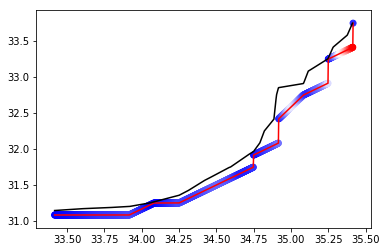

In [109]:
# plotting interpolated contours of coastline, zero water elevation line and scatter points of runup
plt.plot(dummy_lon, dummy_lat, 'r')
plt.plot(dummy_lon, dummy_lat_coast, 'k')
plt.scatter(dummy_lon, dummy_lat, c=zisr, cmap="bwr")

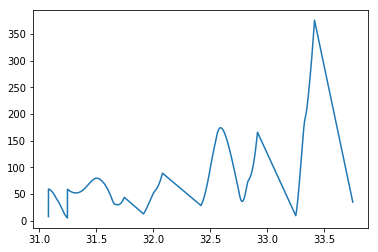

In [105]:
# plotting the interpolated runup as a function of latitude
plt.plot(dummy_lat,zisr)

In [41]:
# calculating the runup by interpolating the bathimetry on the line of zero water elevation using
# interp2d function (griddata is better in this case, since interp2d uses spline interpolation and gives strange
# shapes)
xy = c2.collections[0].get_paths()[1].vertices
dummy_fzb = interpolate.interp2d(fg.X[200:, :50], fg.Y[200:, :50], fg.B[200:, :50])#, bounds_error=True)
B_at_h0 = np.diagonal(dummy_fzb(xy[:, 0], xy[:, 1]))

/Users/sharon/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=60,53 m=2900 fp=35853.531500 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


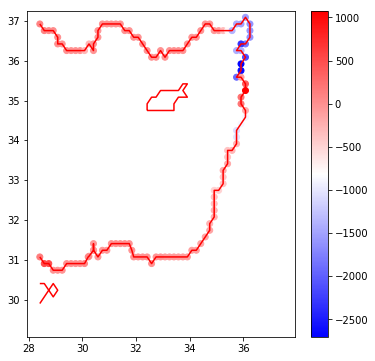

In [50]:
# plotting interpolated contours of zero water elevation line and scatter points of runup calculated by interp2d
# notice negative values
plt.figure(figsize=(6, 6))
plt.scatter(xy[:, 0], xy[:, 1], c=B_at_h0, cmap="bwr")
plt.colorbar()
c3 = plt.contour(fg.X[200:, :50], fg.Y[200:, :50], zeta[200:, :50], levels=[0], colors="r")

In [68]:
# calculating the runup by interpolating the bathimetry on the line of zero water elevation using
# griddata function
z = interpolate.griddata((fg.X[200:, :50].flatten(), fg.Y[200:, :50].flatten()), fg.B[200:, :50].flatten(), xy, "cubic")

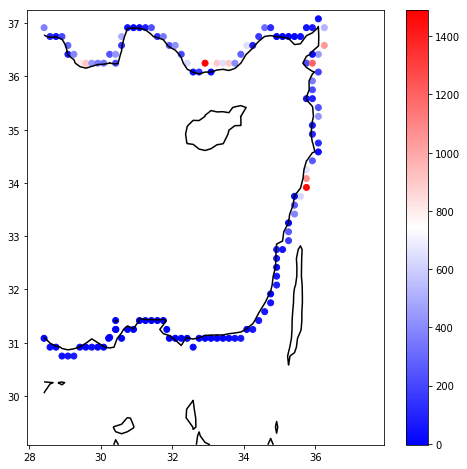

In [70]:
# plotting interpolated contours of zero water elevation line and scatter points of runup calculated by griddata
plt.figure(figsize=(8, 8))
plt.scatter(xy[:, 0], xy[:, 1], c=z, cmap="bwr")
plt.colorbar()
c3 = plt.contour(fg.X[200:, :50], fg.Y[200:, :50], fg.B[200:, :50], levels=[0], colors="k")

In [142]:
def distdtom(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) using cosine formula
    """
    radiEarth=6371000.
        # Convert latitude and longitude to 
            # spherical coordinates in radians.
    degrees_to_radians = pi/180.0
    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    cosi = (sin(phi1)*sin(phi2)*cos(theta1 - theta2) + cos(phi1)*cos(phi2))
    arc = acos(cosi)  
    dist=arc* radiEarth
    return dist

In [20]:
from math import *
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) usine haversine formula
    (which is said to be better for small distances)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    dist = 6371000* c
    return dist

In [144]:
len(xyisr_coast[:, 0])

28

In [110]:
xyisr

array([[ 35.416667,  33.75    ],
       [ 35.416667,  33.583333],
       [ 35.416667,  33.416667],
       [ 35.25    ,  33.25    ],
       [ 35.25    ,  33.083333],
       [ 35.25    ,  32.916667],
       [ 35.083333,  32.75    ],
       [ 34.916667,  32.75    ],
       [ 34.916667,  32.583333],
       [ 34.916667,  32.416667],
       [ 34.916667,  32.25    ],
       [ 34.916667,  32.083333],
       [ 34.75    ,  31.916667],
       [ 34.75    ,  31.75    ],
       [ 34.583333,  31.583333],
       [ 34.416667,  31.416667],
       [ 34.25    ,  31.25    ],
       [ 34.083333,  31.25    ],
       [ 33.916667,  31.083333],
       [ 33.75    ,  31.083333],
       [ 33.583333,  31.083333],
       [ 33.416667,  31.083333]])

In [140]:
haversine(xyisr[0,0], xyisr[0,1], xyisr[1,0], xyisr[1,1])

18532.52483906837

In [143]:
distdtom(xyisr[0,1], xyisr[0,0], xyisr[1,1], xyisr[1,0])

18532.524839112917

In [243]:
def find_inundation(runup_lon, runup_lat, coast_lon, coast_lat):
     """
    Calculate the inundation by finding the shortest distance from the point 
    at the given water elevation level to each point on the coastline.
    As an input receives vectors of coordinates of the given water elevation level
    (longitude and latitude, respectfully) and the coastline (longitude and latitude).
    """
    inundation = np.zeros(len(runup_lon))
    for i in range(len(runup_lon)):
        ddist = np.zeros(len(coast_lon))
        for j in range(len(coast_lon)):
            ddist[j] = haversine(runup_lon[i], runup_lat[i], coast_lon[j], coast_lat[j])
        inundation[i] = np.nanmin(ddist)
    return inundation

In [250]:
in1 = find_inundation(xyisr[:,0], xyisr[:,1], xyisr_coast[:,0], xyisr_coast[:,1])

In [149]:
in1

array([   355.15939158,   3616.79735352,  12401.97011786,    382.15680004,
        12448.76402525,  15365.510483  ,  16839.45333741,   1252.97248551,
         2084.8235148 ,   2834.49480893,   8956.37856152,  11789.44081919,
         3680.23908432,  14639.16959899,  13561.01231943,  10418.21032475,
        11866.25439646,   1933.42383906,  13131.25727204,  11078.56740126,
         9591.2666416 ,   6938.37294738])

In [224]:
in1_cart

array([  355.15939158,  3616.79735352,  6788.21623745,   286.71125607,
        2127.22924865,  1220.75405873,  1938.70045183,   938.36849457,
        2084.8235148 ,   448.75421495,  3589.05024072,  1416.57216424,
        1099.56532264,  1687.73864717,  1861.35416867,  4237.18326278,
         437.74088476,  1634.5733288 ,  3068.62694475,   431.49116495,
         173.17073219,  6257.07942957])

In [225]:
xcor

array([ 35.416667,  35.416667,  35.416667,  35.25    ,  35.25    ,
        35.25    ,  35.083333,  34.916667,  34.916667,  34.916667,
        34.916667,  34.916667,  34.75    ,  34.75    ,  34.583333,
        34.416667,  34.25    ,  34.083333,  33.916667,  33.75    ,
        33.583333,  33.416667])

In [253]:
(in1_cart[12], xyisr[12,:])

(1099.5653226400259, array([ 34.75    ,  31.916667]))

In [223]:
[in1_cart, xcor] = cartesian_inundation(xyisr[:,0], xyisr[:,1], xyisr_coast[:,0], xyisr_coast[:,1])

In [248]:
in2 = find_inundation(dummy_lon, dummy_lat, dummy_lon, dummy_lat_coast)

In [272]:
in2_cart = cartesian_inundation(dummy_lon, dummy_lat, dummy_lon, dummy_lat_coast)

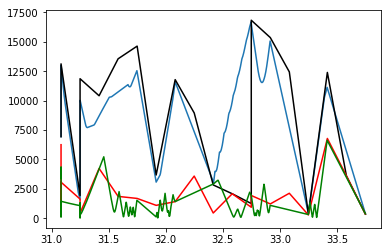

In [273]:
# plotting inundations calculated by different methods
plt.plot(dummy_lat, in2) # interpolated on 1000 points
plt.plot(xyisr[:,1], in1,'k') # inundation
plt.plot(xyisr[:,1], in1_cart,'r') # inundation with distances to segments
plt.plot(dummy_lat, in2_cart,'g') # inundation with distances to segments interpolated on 1000 points

In [1]:
from pymap3d import geodetic2ned as g2ned

In [56]:
# calculating cartesian coordinates of the point on the coastline relative 
# to the point at the given water elevetaion level
(x1, y1, z1) = g2ned(xyisr_coast[27,1], xyisr_coast[27,0], 0, xyisr[0,1], xyisr[0,0], 0, ell=None, deg=True)

In [57]:
# cartesian distance
sqrt(x1**2 + y1**2 + z1**2)

355.92516249162463

In [44]:
# haversine distance
haversine(xyisr[0,0], xyisr[0,1], xyisr_coast[27,0], xyisr_coast[27,1])

355.1593915835813

In [48]:
0.8/355.1593915835813*100

0.22525097715506487

In [258]:
xyisr[:,1]

array([ 33.75    ,  33.583333,  33.416667,  33.25    ,  33.083333,
        32.916667,  32.75    ,  32.75    ,  32.583333,  32.416667,
        32.25    ,  32.083333,  31.916667,  31.75    ,  31.583333,
        31.416667,  31.25    ,  31.25    ,  31.083333,  31.083333,
        31.083333,  31.083333])

In [271]:
def cartesian_inundation(runup_lon, runup_lat, coast_lon, coast_lat):
        """
    Calculate the inundation by finding the shortest distance to the coastline 
    which is done by checking distances from the point 
    at the given water elevation level to each point on the coastline and the 
    distances to the segments of the coastline closest to the point.
    As an input receives vectors of coordinates of the given water elevation level
    (longitude and latitude, respectfully) and the coastline (longitude and latitude).
    """
    inundation = np.zeros(len(runup_lon))
    len_runup = len(runup_lon)
    len_coast = len(coast_lon)
    for i in range(len_runup):
        ddist = 100000*np.ones(2*len_coast)
        for j in range(len_coast):
            ddist[j] = haversine(runup_lon[i], runup_lat[i], coast_lon[j], coast_lat[j])
            if j != (len_coast - 1):
                l1 = g2ned(coast_lat[j], coast_lon[j], 0, runup_lat[i], runup_lon[i], 0, ell=None, deg=True)
                l2 = g2ned(coast_lat[j + 1], coast_lon[j + 1], 0, runup_lat[i], runup_lon[i], 0, ell=None, deg=True)
                l1 = np.array(l1)
                l2 = np.array(l2)
                lenx1 = np.linalg.norm(l1) 
                lenx2x1 = np.linalg.norm(l2 - l1)
                theta1 = acos(np.dot(l1, l2 - l1)/lenx1/lenx2x1)
                if theta1 < pi/2:
                    theta2 = asin(lenx1*sin(theta1)/np.linalg.norm(l2))
                    if theta2 < pi/2:
                        ddist[j + len_coast] = np.linalg.norm(np.cross(l2-l1, l1))/lenx2x1
        inundation[i] = np.nanmin(ddist)
    return inundation

In [261]:
i = 12
runup_lon = xyisr[:,0]
runup_lat = xyisr[:,1]
coast_lon = xyisr_coast[:,0]
coast_lat = xyisr_coast[:,1]
len_coast = len(coast_lon)

In [262]:
ddist = 100000*np.ones(2*len_coast)
for j in range(len_coast):
    ddist[j] = haversine(runup_lon[i], runup_lat[i], coast_lon[j], coast_lat[j])
    if j != (len_coast - 1):
        l1 = g2ned(coast_lat[j], coast_lon[j], 0, runup_lat[i], runup_lon[i], 0, ell=None, deg=True)
        l2 = g2ned(coast_lat[j + 1], coast_lon[j + 1], 0, runup_lat[i], runup_lon[i], 0, ell=None, deg=True)
        l1 = np.array(l1)
        l2 = np.array(l2)
        lenx1 = np.linalg.norm(l1) 
        lenx2x1 = np.linalg.norm(l2 - l1)
        theta1 = acos(np.dot(l1, l2 - l1)/lenx1/lenx2x1)
        if theta1 < pi/2:
            theta2 = asin(lenx1*sin(theta1)/np.linalg.norm(l2))
            if theta2 < pi/2:
                ddist[j + len_coast] = np.linalg.norm(np.cross(l2-l1, l1))/lenx2x1

In [263]:
ddist

array([ 152700.11126364,  138288.87496004,  125039.31163503,
        112068.47903396,   99240.57409917,   95913.47184431,
         78213.49520068,   69640.20351751,   50736.88102855,
         47244.68806863,   25023.16362904,   23608.75670932,
          3680.23908432,    5589.39191945,   18941.69187391,
         37670.86558002,   57062.09703387,   75363.62368042,
         93774.62582552,  105319.60823097,  114880.5903538 ,
        115565.46903904,  134200.15924285,  155368.82992898,
        157014.48281643,  174094.90155308,  194396.02901122,
        213054.57407861,  100000.        ,  100000.        ,
        100000.        ,  100000.        ,  100000.        ,
        100000.        ,  100000.        ,  100000.        ,
        100000.        ,  100000.        ,  100000.        ,
        100000.        ,  100000.        ,    1620.004101  ,
          1099.56532264,    5203.44023893,   10666.29056307,
         10344.87499878,    4424.25713182,   90142.5896209 ,
          1278.23611084,

In [270]:
haversine(coast_lon[13], coast_lat[13], coast_lon[14], coast_lat[14])

13522.231660531237

In [151]:
d = np.linalg.norm(np.cross(l2-l1, l1-p))/np.linalg.norm(l2-l1)

In [152]:
d

129259.42102799367

In [305]:
haversine(34, 31, 32, 31)/48

3971.3071418763902

In [306]:
# reading the GeoClaw output
fg = fgmax_tools.FGmaxGrid()
fg.read_input_data("fgmax_grid.txt")
fg.read_output(outdir="_output")

Reading _output/fort.FG1.valuemax ...
Reading _output/fort.FG1.aux1 ...


In [309]:
idx = [idx for idx in range(len(fg.X)) if fg.X[idx,1] >= 33.4 and fg.X[idx,1] <= 35.5]
idy = [idy for idy in range(len(fg.X[1,:])) if fg.Y[1,idy] >= 30.7 and fg.Y[1,idy] <= 33.8]
x1 = min(idx)
x2 = max(idx) + 1
y1 = min(idy)
y2 = max(idy) + 1

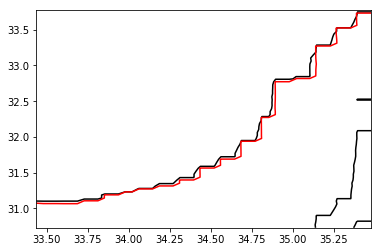

In [311]:
zeta = np.where(fg.B>0, fg.h, fg.h+fg.B) 
b0 = plt.contour(fg.X[x1:x2, y1:y2],fg.Y[x1:x2, y1:y2],fg.B[x1:x2, y1:y2], levels=[0], colors="k")  # coastline
h0 = plt.contour(fg.X[x1:x2, y1:y2],fg.Y[x1:x2, y1:y2],zeta[x1:x2, y1:y2], levels=[0.001], colors = "r")

In [318]:
idx = [idx for idx in range(len(fg.X)) if fg.X[idx,1] >= 22 and fg.X[idx,1] <= 28]
idy = [idy for idy in range(len(fg.X[1,:])) if fg.Y[1,idy] >= 35 and fg.Y[1,idy] <= 38]
x1 = min(idx)
x2 = max(idx) + 1
y1 = min(idy)
y2 = max(idy) + 1

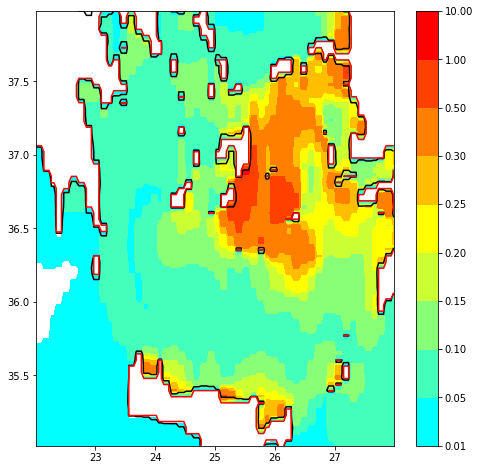

In [319]:
# plotting filled contours of surface elevation, and contours of coastline and zero runup line
clines_zeta = [0.01] + list(np.linspace(0.05,0.3,6)) + [0.5,1.0,10.0]
colors = geoplot.discrete_cmap_1(clines_zeta)
plt.figure(figsize=(8, 8))
plt.clf()
plt.contourf(fg.X[x1:x2, y1:y2],fg.Y[x1:x2, y1:y2],zeta[x1:x2, y1:y2],clines_zeta,colors=colors)
plt.colorbar()
plt.contour(fg.X[x1:x2, y1:y2],fg.Y[x1:x2, y1:y2],fg.B[x1:x2, y1:y2], levels=[0], colors="k")  # coastline
plt.contour(fg.X[x1:x2, y1:y2],fg.Y[x1:x2, y1:y2],zeta[x1:x2, y1:y2], levels=[0.001], colors = "r")

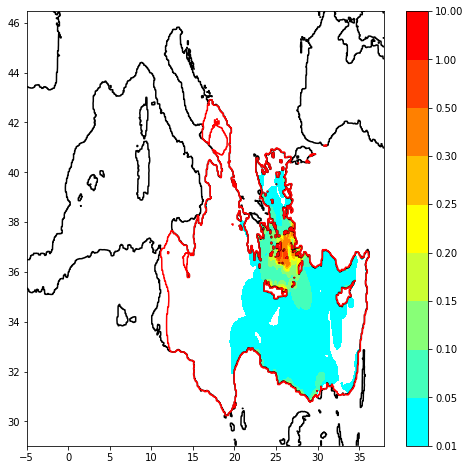

In [315]:
# plotting filled contours of surface elevation, and contours of coastline and zero runup line
clines_zeta = [0.01] + list(np.linspace(0.05,0.3,6)) + [0.5,1.0,10.0]
colors = geoplot.discrete_cmap_1(clines_zeta)
plt.figure(figsize=(8, 8))
plt.clf()
plt.contourf(fg.X,fg.Y,zeta,clines_zeta,colors=colors)
plt.colorbar()
plt.contour(fg.X,fg.Y,fg.B, levels=[0], colors="k")  # coastline
plt.contour(fg.X,fg.Y,zeta, levels=[0.001], colors = "r")